In [30]:
import numpy as np
from scipy import sparse

a = np.zeros((7,6,5))
a[0,2,3] = 17
a[4,5,2] = 12

sA = sparse.csr_matrix(a)

TypeError: expected dimension <= 2 array or matrix

In [26]:
a = np.array([1,1,0,1])

b = np.array([True,True,True,True])

print(b & np.logical_not(a))

[False False  True False]


In [18]:
import sys
import os
import numpy as np
from scipy.optimize import curve_fit
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import datetime
import pdb #python debugger
from timeit import default_timer as timer #timer
from collections import OrderedDict
import importlib
sys.path.insert(1,'/home/ryanlopez/ABPTutorial/c++') #Connects to ABP Folder github.com/ryanlopezzzz/ABPTutorial
from cppmd.builder import *
import cppmd as md
import read_data as rd #reads snapshot text data
import directories #used to create directories for saving data
import Physical_Quantities.vorticity as vorticity
import Physical_Quantities.flocking_factors as flocking_factors
import Physical_Quantities.fourier_calculations as fc
import Physical_Quantities.various as various
importlib.reload(vorticity)
importlib.reload(fc)

<module 'Physical_Quantities.fourier_calculations' from '/home/ryanlopez/codes/Physical_Quantities/fourier_calculations.py'>

In [11]:
save_dir = "/home/ryanlopez/Saved_Data"
exp_name = "long_simulation"
run_name = "packing=0.8000_and_J=1.8000"

run_path = os.path.join(save_dir, exp_name, run_name)

run_desc_file = open(os.path.join(run_path, 'run_desc.json'))
run_desc = json.loads(run_desc_file.read())
run_desc_file.close()

single_stats_file = open(os.path.join(run_path, 'single_stats.json'))
single_stats = json.loads(single_stats_file.read())
single_stats_file.close()


vicsek = single_stats['vicsek_param']
dir_dot_vel = single_stats['dir_dot_vel']
dir_dot_vel_norm = single_stats['dir_dot_vel_norm']
dir_cross_vel = single_stats['dir_cross_vel']
dir_cross_vel_norm = single_stats['dir_cross_vel_norm']

vicsek_dev = single_stats['vicsek_param_std_dev']
dir_dot_vel_dev = single_stats['dir_dot_vel_std_dev']
dir_dot_vel_norm_dev = single_stats['dir_dot_vel_norm_std_dev']
dir_cross_vel_dev = single_stats['dir_cross_vel_std_dev']
dir_cross_vel_norm_dev = single_stats['dir_cross_vel_norm_std_dev']

msd = np.load(os.path.join(run_path, 'msd.npy'))
msd_minus_flock = np.load(os.path.join(run_path, 'msd_minus_flock.npy'))
msd_parallel = np.load(os.path.join(run_path, 'msd_parallel.npy'))
msd_perp = np.load(os.path.join(run_path, 'msd_perp.npy'))

In [26]:
snapshot_dir = os.path.join(run_path, "snapshot_data/")
exp_data = rd.get_exp_data(snapshot_dir)

'\nwarm_up_time = 0 #8e3 #Run simulation for this amount of time to reach steady state\ntf = 1e5 #Time to run simulation while logging physical quantities, after reach steady state\ntstep = 1e-2 #Time step size for integration\nwarm_up_nsteps = int(warm_up_time / tstep) #number of integration steps for warming up\nnsteps = int(tf / tstep) #number of int. steps for logging physical quantites\nrand_seed = random.randint(1,10000) #random seed used for Brownian integration\n'

In [57]:
tf = 1e5
num_snapshots = 5000
times = np.linspace(0, tf, num=num_snapshots)

warm_up_time = 8e3
sim_time = 10e3

# Director Cross Velocity

In [38]:
dir_cross_vel, dir_cross_vel_norm = various.get_dir_cross_vel(exp_data)

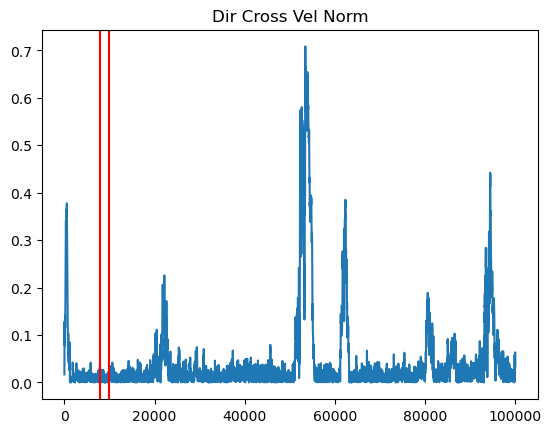

In [58]:
plt.plot(times, np.absolute(dir_cross_vel_norm))
plt.title('Dir Cross Vel Norm')
plt.axvline(x=warm_up_time, color='red')
plt.axvline(x=sim_time, color = 'red')
plt.show()

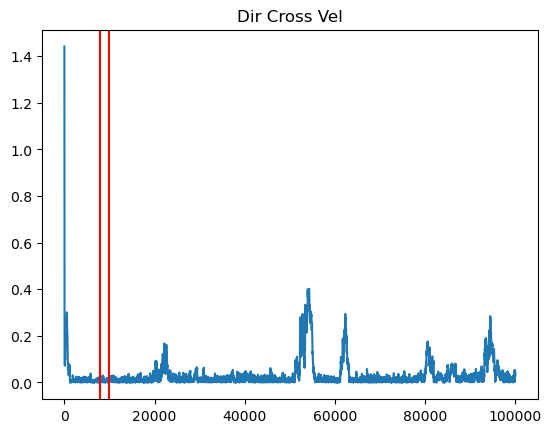

In [59]:
plt.plot(times, np.absolute(dir_cross_vel)/0.03)
plt.title('Dir Cross Vel')
plt.axvline(x=warm_up_time, color='red')
plt.axvline(x=sim_time, color = 'red')
plt.show()

# MSD

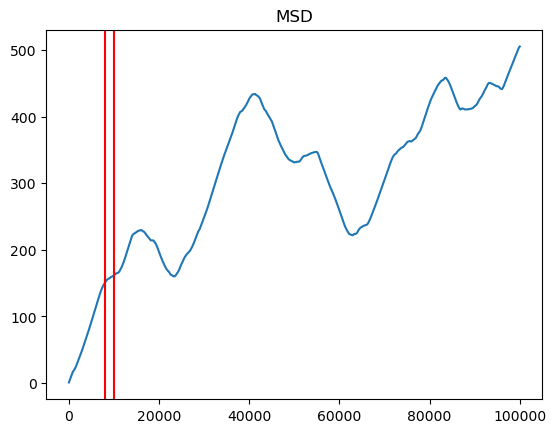

In [60]:
plt.plot(times[1:], np.sqrt(msd))
plt.title('MSD')
plt.axvline(x=warm_up_time, color='red')
plt.axvline(x=sim_time, color = 'red')
plt.show()

# Vicsek Parameter

In [42]:
vicsek_param, vel_param = flocking_factors.get_flocking_factors(exp_data, run_desc['v0'])

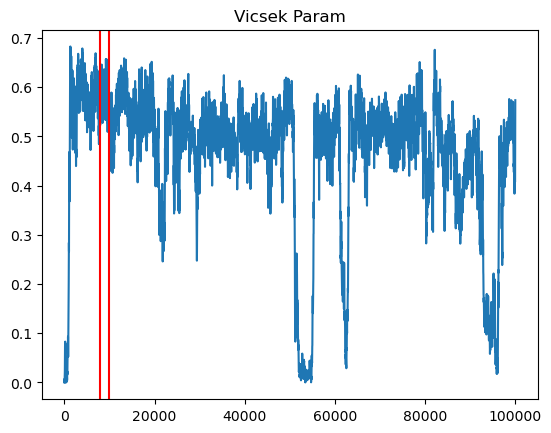

In [61]:
plt.plot(times, vicsek_param)
plt.title('Vicsek Param')
plt.axvline(x=warm_up_time, color='red')
plt.axvline(x=sim_time, color = 'red')
plt.show()

# Dir dot Vel

In [47]:
dir_dot_vel, dir_dot_vel_norm = various.get_dir_dot_vel(exp_data)

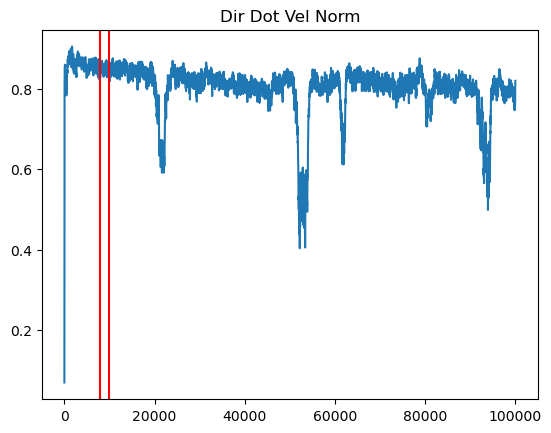

In [62]:
plt.plot(times, dir_dot_vel_norm)
plt.title('Dir Dot Vel Norm')
plt.axvline(x=warm_up_time, color='red')
plt.axvline(x=sim_time, color = 'red')
plt.show()